For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import numpy as np

import seaborn as sns
sns.set()

titanic = pd.read_csv("titanic.csv")
titanic.info()

from scipy.stats import chi2_contingency

import scipy.stats as stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
a=titanic['Age'].mean()                         #fill mean for those Missing data for Age
titanic['Age'].fillna(value=a,inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeBIN       891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


<AxesSubplot:>

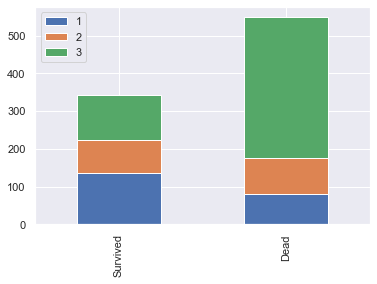

In [47]:
p1=titanic[(titanic['Survived']==1)]['Pclass'].value_counts()
p2=titanic[(titanic['Survived']==0)]['Pclass'].value_counts()
temp=pd.DataFrame([p1,p2])
temp.index = ['Survived','Dead']
temp.plot(kind="bar",stacked=True)

<AxesSubplot:>

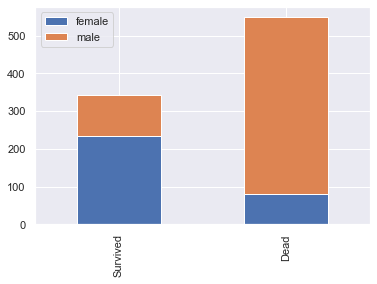

In [48]:
sex1=titanic[(titanic['Survived']==1)]['Sex'].value_counts()
sex2=titanic[(titanic['Survived']==0)]['Sex'].value_counts()
temp=pd.DataFrame([sex1,sex2])
temp.index = ['Survived','Dead']
temp.plot(kind="bar",stacked=True)

Text(0, 0.5, 'Occurrence frequency')

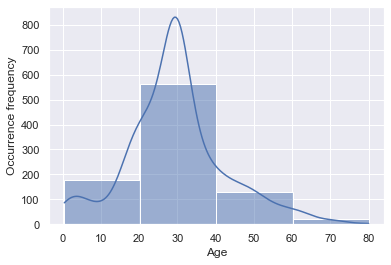

In [54]:
sns.histplot(titanic['Age'],kde=True, bins=4) 
plt.ylabel('Occurrence frequency')

In [61]:
titanic['AgeBIN']=pd.cut(titanic['Age'], bins=4,duplicates='drop',labels=['0to20','21to40','41to60','61to80'])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBIN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,21to40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,21to40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,21to40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,21to40
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,21to40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,21to40
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0to20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,21to40
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,21to40


In [66]:
titanic.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [72]:
titanic['Sex'].replace(['Female','Male'],[0, 1], inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBIN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,21to40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,21to40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,21to40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,21to40
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,21to40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,21to40
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0to20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,21to40
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,21to40


In [105]:
from scipy.stats import chi2_contingency                        # Chi Square - Sex 

data= pd.crosstab(titanic['Sex'],titanic['Survived'],margins=False)

t1=list(data[0])
t2=list(data[1])
table=[t1,t2]
stat, p, dof, expected = chi2_contingency(table)

print (stat)   #chi square value is relatively high
print (p)  #p value is less than 0.05 (<5%) means it's correlated
#degree of freedom=1, decision point of chi square is 3.84, now is 260.7170 is bigger, Refer Chi-square notes

260.71702016732104
1.1973570627755645e-58


In [106]:
from scipy.stats import chi2_contingency                          # Chi Square - Pclass

data= pd.crosstab(titanic['Pclass'],titanic['Survived'],margins=False)

t1=list(data[0])
t2=list(data[1])
table=[t1,t2]
stat, p, dof, expected = chi2_contingency(table)

print (stat)   #chi square value is relatively high
print (p)  #p value is less than 0.05 (<5%) means it's correlated
#degree of freedom=2, decision point of chi squre is 5.99, now is 2102.888988 is bigger, Refer Chi-square notes

# chi squure value > DP 
# P Value <0.05 (5%)

102.88898875696056
4.549251711298793e-23


In [97]:
titanic['Age'].head()
df=titanic.loc[:,['Survived','Age']]
df2=df.dropna()

In [98]:
stats.ttest_ind(df2['Age'][df2['Survived'] == 0],
                df2['Age'][df2['Survived'] == 1])

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

<AxesSubplot:xlabel='Age', ylabel='Count'>

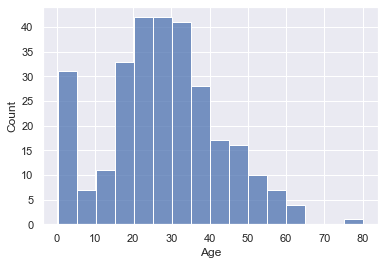

In [104]:
sns.histplot(df2[(df2['Survived']==1)]['Age'])    #Correlation for Survived = 1 vs Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

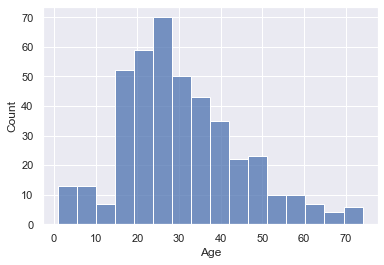

In [103]:
sns.histplot(df2[(df2['Survived']==0)]['Age'])     #Correlation for Survived = 0 vs Age

<AxesSubplot:xlabel='Survived', ylabel='Age'>

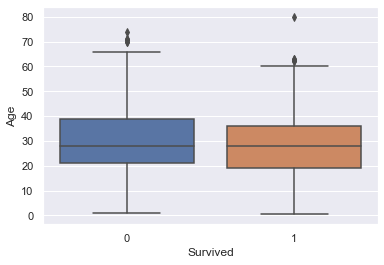

In [88]:
sns.boxplot(x="Survived", y="Age", data=df2)